In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [3]:
df=pd.read_csv("data.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SP_PX_VOLUME        1255 non-null   int64  
 1   SP_PX_LOW           1255 non-null   float64
 2   SP_PX_HIGH          1255 non-null   float64
 3   SP_PX_OPEN          1255 non-null   float64
 4   SP_PX_CLOSE_1D      1255 non-null   float64
 5   SP_VOLUME           1255 non-null   int64  
 6   SP_HIGH             1255 non-null   float64
 7   SP_LOW              1255 non-null   float64
 8   SP_VOLATILITY_30D   1255 non-null   float64
 9   SP_VOLATILITY_90D   1255 non-null   float64
 10  VIX_OPEN            1255 non-null   float64
 11  VIX_PX_CLOSE_1D     1232 non-null   float64
 12  VIX_HIGH            1255 non-null   float64
 13  VIX_LOW             1255 non-null   float64
 14  VIX_VOLATILITY_30D  1255 non-null   float64
 15  VIX_VOLATILITY_90D  1255 non-null   float64
 16  VIX_PX

In [6]:
df.describe()

,SP_PX_VOLUME,SP_PX_LOW,SP_PX_HIGH,SP_PX_OPEN,SP_PX_CLOSE_1D,SP_VOLUME,SP_HIGH,SP_LOW,SP_VOLATILITY_30D,SP_VOLATILITY_90D,...,VIX_VOLATILITY_30D,VIX_VOLATILITY_90D,VIX_PX_OPEN,VIX_PX_HIGH,VIX_PX_LOW,ENERGY_PX_LAST,FIN_PX_LAST,GOLD_PX_LAST,HEALTH_PX_LAST,OIL_PX_LAST
count,1.255000e+03,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03,1255.000000,1255.000000,1255.000000,1255.000000,...,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,6.978523e+08,4507.936765,4561.797968,4535.480143,4534.185594,6.978523e+08,4561.797968,4507.936765,16.597673,16.981641,...,115.015657,116.942414,20.465450,21.581426,19.385068,554.672677,618.896916,178.382789,1532.625116,515.617825
std,2.790198e+08,764.574260,767.298988,766.237531,765.984906,2.790198e+08,767.298988,764.574260,6.976514,6.607585,...,46.719960,32.446598,5.749617,6.470999,5.129963,150.851576,113.642886,33.112815,140.438072,151.145279
min,2.065437e+08,3101.170000,3128.440000,3105.920000,3100.290000,2.065437e+08,3128.440000,3101.170000,6.510000,9.740000,...,45.950000,62.820000,11.530000,12.230000,10.620000,209.690000,376.870000,108.270000,1173.970000,162.140000
25%,5.717279e+08,3938.955000,4000.945000,3971.275000,3971.040000,5.717279e+08,4000.945000,3938.955000,11.685000,12.165000,...,81.195000,86.280000,16.060000,16.815000,15.315000,414.305000,550.710000,151.405000,1474.295000,394.510000
50%,6.421719e+08,4355.410000,4407.550000,4380.580000,4378.380000,6.421719e+08,4407.550000,4355.410000,14.570000,14.550000,...,103.520000,119.410000,19.540000,20.600000,18.570000,621.920000,605.190000,178.800000,1541.870000,578.120000
75%,7.356206e+08,5089.895000,5145.000000,5118.455000,5110.465000,7.356206e+08,5145.000000,5089.895000,19.820000,20.615000,...,136.995000,147.920000,23.910000,25.145000,22.450000,673.080000,678.065000,201.530000,1621.335000,624.870000
max,3.305469e+09,6174.970000,6215.080000,6193.360000,6173.070000,3.305469e+09,6215.080000,6174.970000,43.550000,54.990000,...,255.780000,204.600000,60.130000,65.730000,38.580000,749.390000,871.950000,288.200000,1829.710000,734.300000


In [8]:
df_clean = df.dropna()
df_filled = df.fillna(0)

In [10]:
print(df.isnull().sum())

SP_PX_VOLUME           0
SP_PX_LOW              0
SP_PX_HIGH             0
SP_PX_OPEN             0
SP_PX_CLOSE_1D         0
SP_VOLUME              0
SP_HIGH                0
SP_LOW                 0
SP_VOLATILITY_30D      0
SP_VOLATILITY_90D      0
VIX_OPEN               0
VIX_PX_CLOSE_1D       23
VIX_HIGH               0
VIX_LOW                0
VIX_VOLATILITY_30D     0
VIX_VOLATILITY_90D     0
VIX_PX_OPEN            0
VIX_PX_HIGH            0
VIX_PX_LOW             0
ENERGY_PX_LAST         0
FIN_PX_LAST            0
GOLD_PX_LAST           0
HEALTH_PX_LAST         0
OIL_PX_LAST            0
dtype: int64


In [12]:
df = df.dropna(subset=['VIX_PX_CLOSE_1D'])

In [14]:
print(df.isnull().sum())

SP_PX_VOLUME          0
SP_PX_LOW             0
SP_PX_HIGH            0
SP_PX_OPEN            0
SP_PX_CLOSE_1D        0
SP_VOLUME             0
SP_HIGH               0
SP_LOW                0
SP_VOLATILITY_30D     0
SP_VOLATILITY_90D     0
VIX_OPEN              0
VIX_PX_CLOSE_1D       0
VIX_HIGH              0
VIX_LOW               0
VIX_VOLATILITY_30D    0
VIX_VOLATILITY_90D    0
VIX_PX_OPEN           0
VIX_PX_HIGH           0
VIX_PX_LOW            0
ENERGY_PX_LAST        0
FIN_PX_LAST           0
GOLD_PX_LAST          0
HEALTH_PX_LAST        0
OIL_PX_LAST           0
dtype: int64


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = df.select_dtypes(include='number').columns
scaled_data = scaler.fit_transform(df[numeric])

In [18]:
scaled_df = pd.DataFrame(scaled_data, columns=numeric, index=df.index)

In [20]:
print(scaled_df.head())

   SP_PX_VOLUME  SP_PX_LOW  SP_PX_HIGH  SP_PX_OPEN  SP_PX_CLOSE_1D  SP_VOLUME  \
0     -0.306412  -1.838019   -1.866309   -1.863993       -1.870141  -0.306412   
1     -0.391037  -1.807365   -1.817424   -1.814585       -1.849741  -0.391037   
2     -0.274438  -1.766970   -1.795473   -1.799324       -1.831202  -0.274438   
3     -0.438597  -1.783196   -1.793433   -1.784719       -1.766073  -0.438597   
4     -0.374013  -1.791598   -1.809588   -1.802232       -1.811143  -0.374013   

    SP_HIGH    SP_LOW  SP_VOLATILITY_30D  SP_VOLATILITY_90D  ...  \
0 -1.866309 -1.838019           1.484253           5.746257  ...   
1 -1.817424 -1.807365           1.462737           5.746257  ...   
2 -1.795473 -1.766970           1.507204           5.746257  ...   
3 -1.793433 -1.783196           1.522983           5.672186  ...   
4 -1.809588 -1.791598           1.491425           5.673698  ...   

   VIX_VOLATILITY_30D  VIX_VOLATILITY_90D  VIX_PX_OPEN  VIX_PX_HIGH  \
0            0.705586            

In [22]:
# Create the target: 1 if next day is up, 0 if down
df['Target'] = (df['SP_PX_CLOSE_1D'].shift(-1) > df['SP_PX_CLOSE_1D']).astype(int)
X = scaled_df              
Y = df['Target'] 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
print(f"training set size:{X_train.shape[0]} samples")
print(f"test set size:{Y_test.shape[0]} samples")

training set size:985 samples
test set size:247 samples


In [28]:
#logistic regression

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

Accuracy: 0.7773279352226721
Classification Report:
              precision    recall  f1-score   support

        Down       0.81      0.64      0.72       109
          Up       0.76      0.88      0.82       138

    accuracy                           0.78       247
   macro avg       0.79      0.76      0.77       247
weighted avg       0.78      0.78      0.77       247

Confusion Matrix:
[[ 70  39]
 [ 16 122]]


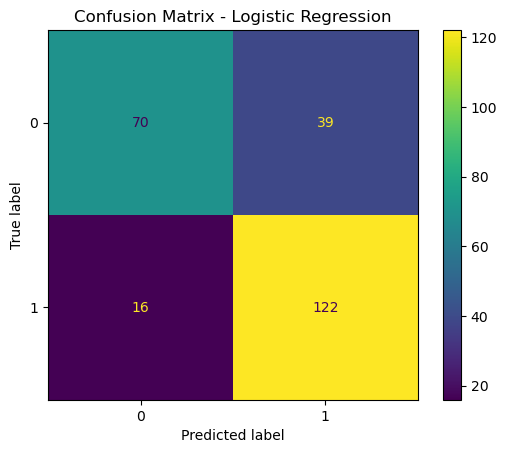

In [30]:
Y_pred = log_model.predict(X_test)
from sklearn.metrics import accuracy_score
Y_pred = log_model.predict(X_test)

#accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))

#classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=["Down", "Up"]))

#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

#ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_model, X_test, Y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [32]:
#Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

Accuracy: 0.5789473684210527

Classification Report:
               precision    recall  f1-score   support

        Down       0.54      0.34      0.42       109
          Up       0.60      0.77      0.67       138

    accuracy                           0.58       247
   macro avg       0.57      0.55      0.54       247
weighted avg       0.57      0.58      0.56       247

Confusion Matrix:
 [[ 37  72]
 [ 32 106]]


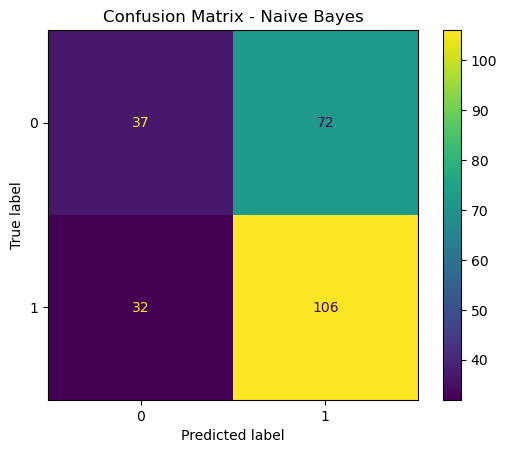

In [34]:
Y_pred_nb = nb_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test, Y_pred_nb))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_nb, target_names=["Down", "Up"]))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_nb))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(nb_model, X_test, Y_test)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

Accuracy: 0.5708502024291497

Classification Report:
               precision    recall  f1-score   support

        Down       0.51      0.61      0.55       109
          Up       0.64      0.54      0.59       138

    accuracy                           0.57       247
   macro avg       0.57      0.57      0.57       247
weighted avg       0.58      0.57      0.57       247

Confusion Matrix:
 [[66 43]
 [63 75]]


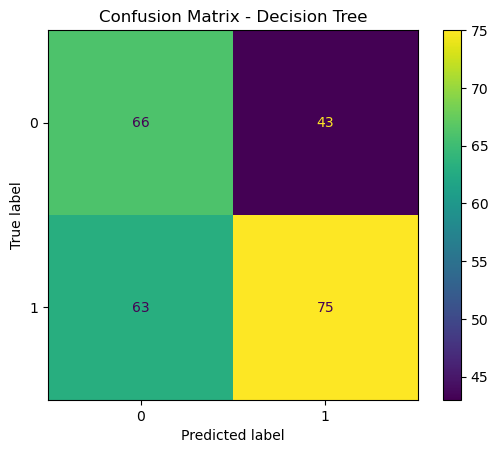

In [36]:
#decision trees

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test, Y_pred_dt))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_dt, target_names=["Down", "Up"]))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_dt))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt_model, X_test, Y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Accuracy: 0.5465587044534413

Classification Report:
               precision    recall  f1-score   support

        Down       0.49      0.58      0.53       109
          Up       0.61      0.52      0.56       138

    accuracy                           0.55       247
   macro avg       0.55      0.55      0.55       247
weighted avg       0.56      0.55      0.55       247

Confusion Matrix:
 [[63 46]
 [66 72]]


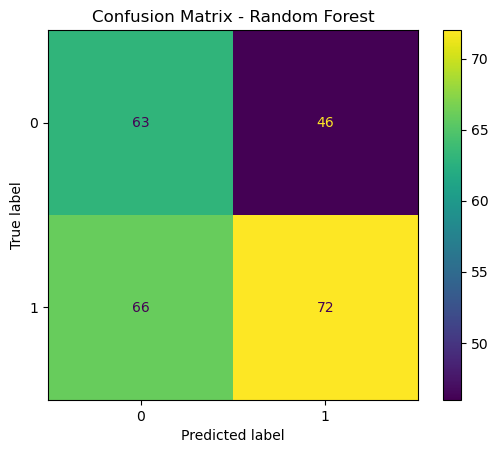

In [38]:
#random forest

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_rf, target_names=["Down", "Up"]))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rf))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, Y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

Accuracy: 0.7408906882591093

Classification Report:
               precision    recall  f1-score   support

        Down       0.71      0.71      0.71       109
          Up       0.77      0.77      0.77       138

    accuracy                           0.74       247
   macro avg       0.74      0.74      0.74       247
weighted avg       0.74      0.74      0.74       247

Confusion Matrix:
 [[ 77  32]
 [ 32 106]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


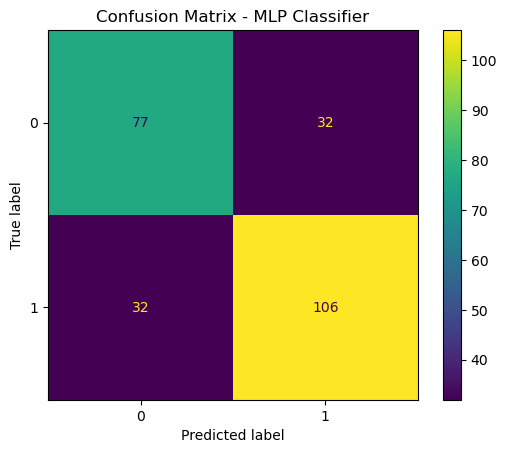

In [40]:
#Multi-layer percepton

from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, Y_train)
Y_pred_mlp = mlp_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test, Y_pred_mlp))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_mlp, target_names=["Down", "Up"]))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_mlp))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, Y_test)
plt.title("Confusion Matrix - MLP Classifier")
plt.show()

In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=500)
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    
    results.append([name, acc, prec, rec, f1])

# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.777328   0.757764  0.884058  0.816054
1          Naive Bayes  0.578947   0.595506  0.768116  0.670886
2        Decision Tree  0.570850   0.635593  0.543478  0.585938
3        Random Forest  0.546559   0.610169  0.521739  0.562500
4       MLP Classifier  0.740891   0.768116  0.768116  0.768116


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
probs = log_model.predict_proba(scaled_data)
print("Probability Up:", probs[0][1], "Probability Down:", probs[0][0])

Probability Up: 0.6144259683928095 Probability Down: 0.3855740316071905


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
import pandas as pd

last_day_df = pd.DataFrame([scaled_data[-1]], columns=X_train.columns)

probs = log_model.predict_proba(last_day_df)
print("Next Day - Probability Up:", probs[0][1], "Probability Down:", probs[0][0])

Next Day - Probability Up: 0.7608106065035632 Probability Down: 0.23918939349643675


In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Suppose your DataFrame is 'df' and your target column is 'TARGET'
# Replace 'TARGET' with the name of your target column
X = scaled_df              
Y = df['Target'] 

# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, Y)

# Get feature importance
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

# Print top features
print("Feature Influence Ranking:")
print(importance)

Feature Influence Ranking:
SP_VOLUME             0.056904
SP_PX_CLOSE_1D        0.054818
SP_PX_VOLUME          0.051325
SP_VOLATILITY_30D     0.049388
VIX_PX_CLOSE_1D       0.046913
OIL_PX_LAST           0.044690
VIX_PX_HIGH           0.044137
ENERGY_PX_LAST        0.043797
VIX_HIGH              0.042239
GOLD_PX_LAST          0.041460
HEALTH_PX_LAST        0.041332
FIN_PX_LAST           0.040611
VIX_VOLATILITY_30D    0.039857
VIX_VOLATILITY_90D    0.039688
SP_PX_OPEN            0.039455
VIX_PX_OPEN           0.037744
VIX_OPEN              0.037484
VIX_LOW               0.037331
VIX_PX_LOW            0.036876
SP_VOLATILITY_90D     0.036375
SP_LOW                0.035478
SP_HIGH               0.034610
SP_PX_LOW             0.034309
SP_PX_HIGH            0.033179
dtype: float64


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

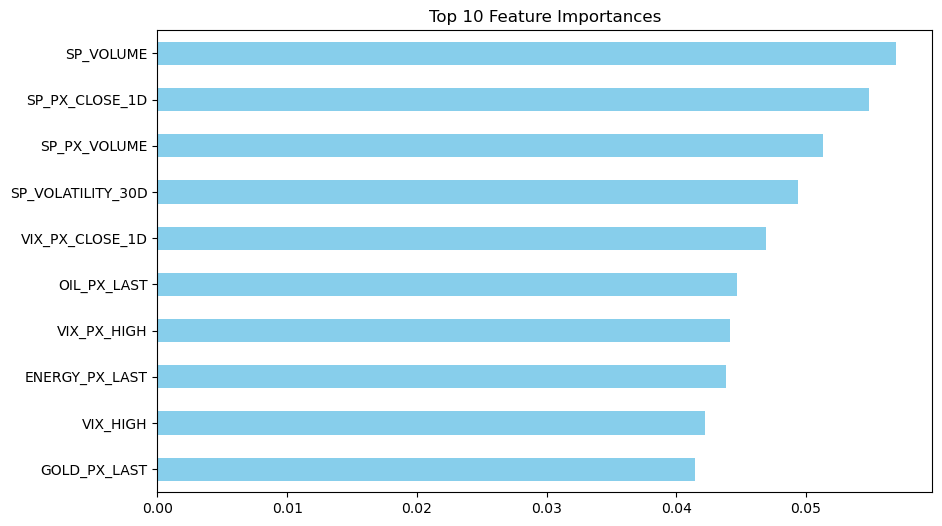

In [50]:
import matplotlib.pyplot as plt
top_features = importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Largest at the top
plt.title("Top 10 Feature Importances")
plt.xlabel

In [52]:
import pandas as pd

# Assuming your DataFrame is called df and contains 'SP_PX_CLOSE_1D'

# Simple Moving Averages (SMA)
df['SMA_5'] = df['SP_PX_CLOSE_1D'].rolling(window=5).mean()
df['SMA_10'] = df['SP_PX_CLOSE_1D'].rolling(window=10).mean()
df['SMA_20'] = df['SP_PX_CLOSE_1D'].rolling(window=20).mean()
df['SMA_50'] = df['SP_PX_CLOSE_1D'].rolling(window=50).mean()

# Exponential Moving Averages (EMA)
df['EMA_5'] = df['SP_PX_CLOSE_1D'].ewm(span=5, adjust=False).mean()
df['EMA_10'] = df['SP_PX_CLOSE_1D'].ewm(span=10, adjust=False).mean()
df['EMA_20'] = df['SP_PX_CLOSE_1D'].ewm(span=20, adjust=False).mean()
df['EMA_50'] = df['SP_PX_CLOSE_1D'].ewm(span=50, adjust=False).mean()

#Drop rows with NaN values from moving averages (first few rows)
df = df.dropna()

print(df[['SP_PX_CLOSE_1D', 'SMA_5', 'SMA_20', 'EMA_5', 'EMA_20']].head(15))


    SP_PX_CLOSE_1D     SMA_5     SMA_20        EMA_5       EMA_20
49         3398.96  3438.732  3431.1365  3418.487920  3418.810419
50         3339.19  3390.402  3429.0785  3392.055280  3411.227522
51         3340.97  3367.584  3427.4555  3375.026853  3404.536330
52         3383.54  3358.900  3427.9900  3377.864569  3402.536679
53         3401.20  3372.772  3428.9505  3385.643046  3402.409376
54         3385.49  3370.078  3428.7360  3385.592031  3400.798007
55         3357.01  3373.642  3427.8440  3376.064687  3396.627721
56         3319.47  3369.342  3424.5420  3357.199791  3389.279366
57         3281.06  3348.846  3418.7370  3331.819861  3378.972760
58         3315.57  3331.720  3412.9515  3326.403241  3372.934402
59         3236.92  3302.006  3402.6165  3296.575494  3359.980649
60         3246.59  3279.922  3391.0095  3279.913662  3349.181540
61         3298.46  3275.720  3381.7050  3286.095775  3344.350917
62         3351.60  3289.828  3373.8845  3307.930517  3345.041306
63        

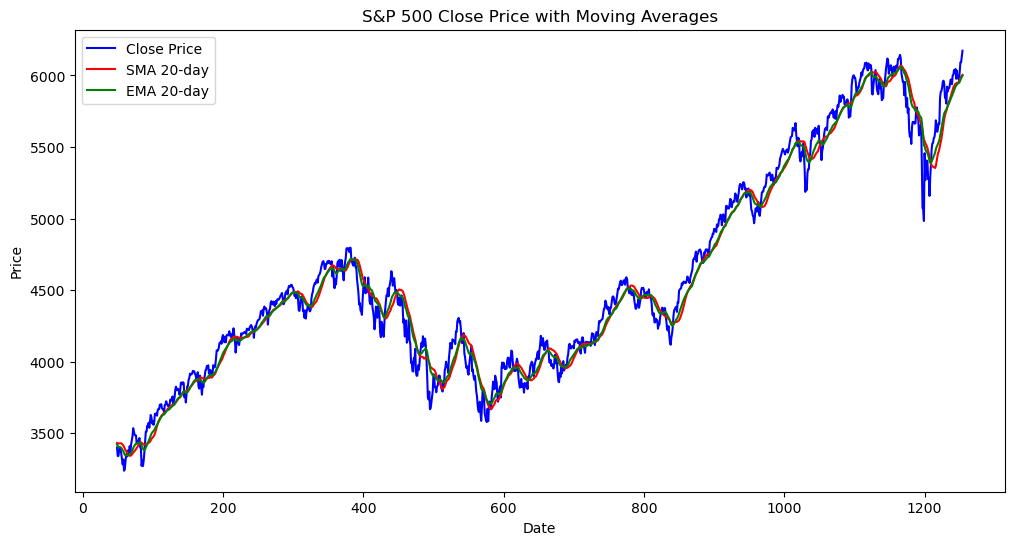

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['SP_PX_CLOSE_1D'], label='Close Price', color='blue')
plt.plot(df['SMA_20'], label='SMA 20-day', color='red')
plt.plot(df['EMA_20'], label='EMA 20-day', color='green')
plt.title("S&P 500 Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [56]:
print("end", "THANK YOU")

end THANK YOU
